#bharat intern
# TO PREDICT THE STOCK PRICE OF A COMPANY USING LSTM
#Introduction
This dataset encompasses historical records of Google's stock prices and associated characteristics. It encompasses 14 columns and a more concise subset of 1,258 rows. Each column denotes a distinct attribute, while every row holds the corresponding values for that attribute.

#STEPS INVOLVED :
1.Importing the necessary libraries   

2.Data Loading

3.Exploratory Data Analysis (EDA)

4.Creating LSTM Model

5.Visualizing Actual and Predicted data

6.Prediction for upcoming days


#1. Importing the necessary libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM, Bidirectional

# 2.Data Loading

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
dataset = pd.read_csv('/content/drive/MyDrive/Task_1_Stocks_dataset.csv')
dataset.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,GOOG,2016-06-14 00:00:00+00:00,718.27,722.47,713.1200,716.48,1306065,718.27,722.47,713.1200,716.48,1306065,0.0,1.0
1,GOOG,2016-06-15 00:00:00+00:00,718.92,722.98,717.3100,719.00,1214517,718.92,722.98,717.3100,719.00,1214517,0.0,1.0
2,GOOG,2016-06-16 00:00:00+00:00,710.36,716.65,703.2600,714.91,1982471,710.36,716.65,703.2600,714.91,1982471,0.0,1.0
3,GOOG,2016-06-17 00:00:00+00:00,691.72,708.82,688.4515,708.65,3402357,691.72,708.82,688.4515,708.65,3402357,0.0,1.0
4,GOOG,2016-06-20 00:00:00+00:00,693.71,702.48,693.4100,698.77,2082538,693.71,702.48,693.4100,698.77,2082538,0.0,1.0


In [ ]:
dataset.tail()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1253,GOOG,2021-06-07 00:00:00+00:00,2466.09,2468.000,2441.0725,2451.32,1192453,2466.09,2468.000,2441.0725,2451.32,1192453,0.0,1.0
1254,GOOG,2021-06-08 00:00:00+00:00,2482.85,2494.495,2468.2400,2479.90,1253253,2482.85,2494.495,2468.2400,2479.90,1253253,0.0,1.0
1255,GOOG,2021-06-09 00:00:00+00:00,2491.40,2505.000,2487.3300,2499.50,1006337,2491.40,2505.000,2487.3300,2499.50,1006337,0.0,1.0
1256,GOOG,2021-06-10 00:00:00+00:00,2521.60,2523.260,2494.0000,2494.01,1561733,2521.60,2523.260,2494.0000,2494.01,1561733,0.0,1.0
1257,GOOG,2021-06-11 00:00:00+00:00,2513.93,2526.990,2498.2900,2524.92,1262309,2513.93,2526.990,2498.2900,2524.92,1262309,0.0,1.0


#3.Exploratory Data Analysis (EDA)
Exploratory Data Analysis (EDA) is the initial step in data analysis. It involves summarizing and visualizing data to understand its characteristics, identify patterns, and detect anomalies. For the Titanic dataset, you would check data structure, compute summary statistics, and create visualizations to gain insights into passenger information.

In [ ]:
# statistical description of dataset
dataset.describe()

,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
count,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03,1258.0,1258.0
mean,1216.317067,1227.430934,1204.176430,1215.260779,1.601590e+06,1216.317067,1227.430936,1204.176436,1215.260779,1.601590e+06,0.0,1.0
std,383.333358,387.570872,378.777094,382.446995,6.960172e+05,383.333358,387.570873,378.777099,382.446995,6.960172e+05,0.0,0.0
min,668.260000,672.300000,663.284000,671.000000,3.467530e+05,668.260000,672.300000,663.284000,671.000000,3.467530e+05,0.0,1.0
25%,960.802500,968.757500,952.182500,959.005000,1.173522e+06,960.802500,968.757500,952.182500,959.005000,1.173522e+06,0.0,1.0
50%,1132.460000,1143.935000,1117.915000,1131.150000,1.412588e+06,1132.460000,1143.935000,1117.915000,1131.150000,1.412588e+06,0.0,1.0
75%,1360.595000,1374.345000,1348.557500,1361.075000,1.812156e+06,1360.595000,1374.345000,1348.557500,1361.075000,1.812156e+06,0.0,1.0
max,2521.600000,2526.990000,2498.290000,2524.920000,6.207027e+06,2521.600000,2526.990000,2498.290000,2524.920000,6.207027e+06,0.0,1.0


In [ ]:
# shape of the dataset
dataset.shape

(1258, 14)

so in this dataset rows =1258 and columns = 14

In [ ]:
# summary of the dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   symbol       1258 non-null   object 
 1   date         1258 non-null   object 
 2   close        1258 non-null   float64
 3   high         1258 non-null   float64
 4   low          1258 non-null   float64
 5   open         1258 non-null   float64
 6   volume       1258 non-null   int64  
 7   adjClose     1258 non-null   float64
 8   adjHigh      1258 non-null   float64
 9   adjLow       1258 non-null   float64
 10  adjOpen      1258 non-null   float64
 11  adjVolume    1258 non-null   int64  
 12  divCash      1258 non-null   float64
 13  splitFactor  1258 non-null   float64
dtypes: float64(10), int64(2), object(2)
memory usage: 137.7+ KB


In [ ]:
# checking null value in the dataset
dataset.isnull().sum()

symbol         0
date           0
close          0
high           0
low            0
open           0
volume         0
adjClose       0
adjHigh        0
adjLow         0
adjOpen        0
adjVolume      0
divCash        0
splitFactor    0
dtype: int64

we can see there is not any null value available in the dataset

In [ ]:
dataset = dataset[['date', 'open', 'close']]
dataset['date'] = pd.to_datetime(dataset['date'].apply(lambda x: x.split()[0]))
dataset.loc[:, 'date'] = pd.to_datetime(dataset['date'])
dataset = dataset.set_index('date', drop=True)
dataset.head(10)


<ipython-input-81-336d810546d1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['date'] = pd.to_datetime(dataset['date'].apply(lambda x: x.split()[0]))
<ipython-input-81-336d810546d1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset.loc[:, 'date'] = pd.to_datetime(dataset['date'])
<ipython-input-81-336d810546d1>:3: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use e

,open,close
date,,
2016-06-14,716.48,718.27
2016-06-15,719.00,718.92
2016-06-16,714.91,710.36
2016-06-17,708.65,691.72
2016-06-20,698.77,693.71
2016-06-21,698.40,695.94
2016-06-22,699.06,697.46
2016-06-23,697.45,701.87
2016-06-24,675.17,675.22


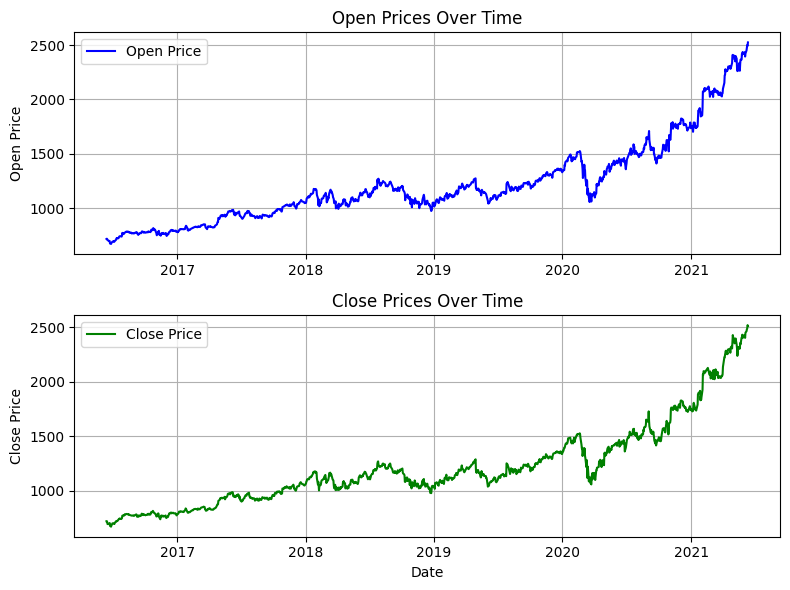

In [ ]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(8, 6))

axes[0].plot(dataset.index, dataset['open'], label='Open Price', color='blue')
axes[0].set_ylabel('Open Price')
axes[0].set_title('Open Prices Over Time')
axes[0].grid(True)

axes[1].plot(dataset.index, dataset['close'], label='Close Price', color='green')
axes[1].set_xlabel('Date')
axes[1].set_ylabel('Close Price')
axes[1].set_title('Close Prices Over Time')
axes[1].grid(True)

axes[0].legend()
axes[1].legend()

plt.tight_layout()
plt.show()



In [ ]:
from sklearn.preprocessing import MinMaxScaler
numeric_cols = dataset.select_dtypes(include=['float64', 'int64']).columns
Minmax = MinMaxScaler()
dataset[numeric_cols] = Minmax.fit_transform(dataset[numeric_cols])
dataset.head(10)


,open,close
date,,
2016-06-14,0.024532,0.026984
2016-06-15,0.025891,0.027334
2016-06-16,0.023685,0.022716
2016-06-17,0.020308,0.012658
2016-06-20,0.014979,0.013732
2016-06-21,0.014779,0.014935
2016-06-22,0.015135,0.015755
2016-06-23,0.014267,0.018135
2016-06-24,0.002249,0.003755


In [ ]:
# splitting the data into training and test set
training_size = round(len(dataset) * 0.75)
training_size

944

In [ ]:
train_data = dataset[:training_size]
test_data  = dataset[training_size:]
print(train_data.shape, test_data.shape)


(944, 2) (314, 2)


In [ ]:
def create_sequences(data, sequence_length):
    sequences = []
    labels = []

    for i in range(len(data) - sequence_length):
        sequence = data.iloc[i:i + sequence_length]
        label = data.iloc[i + sequence_length]
        sequences.append(sequence)
        labels.append(label)

    return np.array(sequences), np.array(labels)

sequence_length = 50  # Adjust as needed

train_seq, train_label = create_sequences(train_data, sequence_length)
test_seq, test_label = create_sequences(test_data, sequence_length)


# 4. Creating LSTM Model

In [ ]:
# imported Sequential from keras.models
model = Sequential()
# importing Dense, Dropout, LSTM, Bidirectional from keras.layers
model.add(LSTM(units=50, return_sequences=True, input_shape = (train_seq.shape[1], train_seq.shape[2])))

model.add(Dropout(0.1))
model.add(LSTM(units=50))

model.add(Dense(2))

model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_absolute_error'])

model.summary()


Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_5 (LSTM)               (None, 50, 50)            10600     
                                                                 
 dropout (Dropout)           (None, 50, 50)            0         
                                                                 
 lstm_6 (LSTM)               (None, 50)                20200     
                                                                 
 dense_5 (Dense)             (None, 2)                 102       
                                                                 
Total params: 30902 (120.71 KB)
Trainable params: 30902 (120.71 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# fitting the model by iterating the dataset over 100 times(100 epochs)
model.fit(train_seq, train_label, epochs=100,validation_data=(test_seq, test_label), verbose=1)

Epoch 1/100
28/28 [==============================] - 9s 135ms/step - loss: 0.0092 - mean_absolute_error: 0.0681 - val_loss: 0.0226 - val_mean_absolute_error: 0.1221
Epoch 2/100
28/28 [==============================] - 2s 74ms/step - loss: 9.6308e-04 - mean_absolute_error: 0.0246 - val_loss: 0.0104 - val_mean_absolute_error: 0.0829
Epoch 3/100
28/28 [==============================] - 3s 94ms/step - loss: 5.3836e-04 - mean_absolute_error: 0.0172 - val_loss: 0.0050 - val_mean_absolute_error: 0.0537
Epoch 4/100
28/28 [==============================] - 2s 55ms/step - loss: 4.7692e-04 - mean_absolute_error: 0.0159 - val_loss: 0.0059 - val_mean_absolute_error: 0.0594
Epoch 5/100
28/28 [==============================] - 1s 51ms/step - loss: 4.6575e-04 - mean_absolute_error: 0.0160 - val_loss: 0.0042 - val_mean_absolute_error: 0.0487
Epoch 6/100
28/28 [==============================] - 1s 52ms/step - loss: 4.6103e-04 - mean_absolute_error: 0.0157 - val_loss: 0.0051 - val_mean_absolute_error: 0.

In [ ]:
# predict the model
test_predicted = model.predict(test_seq)
test_predicted[:5]

9/9 [==============================] - 1s 14ms/step


array([[0.41140026, 0.41591477],
       [0.411169  , 0.41633582],
       [0.40628374, 0.41224003],
       [0.41015702, 0.41483784],
       [0.4148978 , 0.41885388]], dtype=float32)

In [ ]:
# Inversing normalization
test_inverse_predicted = Minmax.inverse_transform(test_predicted)
test_inverse_predicted[:5]

array([[1433.7031, 1439.0916],
       [1433.2744, 1439.8718],
       [1424.2175, 1432.281 ],
       [1431.3983, 1437.0956],
       [1440.1874, 1444.5387]], dtype=float32)

# 5.Visualizing Actual and  Predicted data

In [ ]:
# Merging actual and predicted data
dataset_merge = pd.concat([dataset.iloc[-264:].copy(),
                          pd.DataFrame(test_inverse_predicted,columns=['open_predicted','close_predicted'],
                                       index=dataset.iloc[-264:].index)], axis=1)

In [ ]:
# Inversing normalization
dataset_merge[['open','close']] = Minmax.inverse_transform(dataset_merge[['open','close']])
dataset_merge.head()

,open,close,open_predicted,close_predicted
date,,,,
2020-05-27,1417.25,1417.84,1433.703125,1439.091553
2020-05-28,1396.86,1416.73,1433.274414,1439.871826
2020-05-29,1416.94,1428.92,1424.217529,1432.281006
2020-06-01,1418.39,1431.82,1431.398315,1437.095581
2020-06-02,1430.55,1439.22,1440.187378,1444.538696


#PREDICTING UPCOMING 5 DAYS

In [ ]:
dataset_merge = dataset_merge.append(pd.DataFrame(columns=dataset_merge.columns,
                                        index=pd.date_range(start=dataset_merge.index[-1], periods=11, freq='D', closed='right')))
dataset_merge['2021-06-09':'2021-06-13']

<ipython-input-109-126ce9ac8216>:2: FutureWarning: Argument `closed` is deprecated in favor of `inclusive`.
  index=pd.date_range(start=dataset_merge.index[-1], periods=11, freq='D', closed='right')))
<ipython-input-109-126ce9ac8216>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataset_merge = dataset_merge.append(pd.DataFrame(columns=dataset_merge.columns,


,open,close,open_predicted,close_predicted
2021-06-09,2499.50,2491.40,2426.946045,2428.330322
2021-06-10,2494.01,2521.60,2434.863770,2436.788330
2021-06-11,2524.92,2513.93,2444.090820,2445.719238
2021-06-12,NaN,NaN,NaN,NaN
2021-06-13,NaN,NaN,NaN,NaN
